In [784]:
%pip install librosa

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [785]:
import matplotlib.pyplot as plt
%matplotlib inline

In [786]:
filename = 'olivia_static.wav'

In [787]:
import IPython.display as ipd
import librosa
import librosa.display

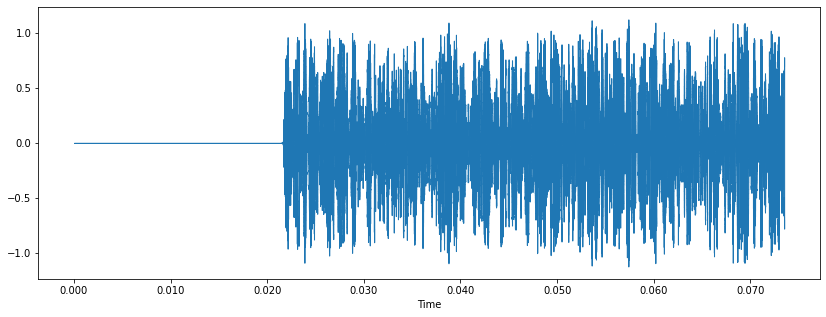

In [788]:
##olivia static sound
plt.figure(figsize=(14,5))
data, sr = librosa.load(filename)
librosa.display.waveshow(data, sr=192000) ## set to the 192kHz Dr. Tan mentioned
ipd.Audio(filename)

In [789]:
### reading with scipy for two channels w/out normalization
audio_file_path = 'olivia_static.wav'
from scipy.io  import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [790]:
wave_audio  ##no need to worry about the two channels being normalized, one channel has no info 

array([     0,      0,      0, ..., -24578,  32510, -25346], dtype=int16)

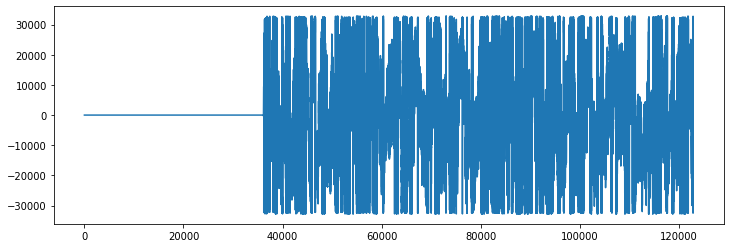

In [791]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,4))
plt.plot(wave_audio)

#I'm assuming the  graph looks slightly more different because of the sample_rate changes

In [792]:
import pandas as pd
metadata = pd.read_csv('wav_folders/testingSounds - Sheet1.csv')
metadata.head(10)

,slice file name,classID,class
0,static 1_9178222162229323269.wav,1,static
1,static 2_4078748281670101868.wav,1,static
2,static 3_7598384045136679274.wav,1,static
3,static 4_6246768117683620741.wav,1,static
4,static 5_8769259942785288092.wav,1,static
5,static 6_8922722029868631012.wav,1,static
6,static 7_7355975401529701767.wav,1,static
7,static 8_8205597702138129722.wav,1,static
8,static 9_652191485222133491.wav,1,static
9,static 10_619229174254252517.wav,1,static


In [793]:
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=192000, n_mfcc=40)
print(mfccs.shape)
#array of dimensions

(40, 28)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [794]:
mfccs

array([[-6.0225159e+02, -6.0225159e+02, -6.0225159e+02, ...,
         2.1786997e+01,  3.4900154e+01,  2.5062719e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.6014328e+01,  7.0061996e+01,  6.5673203e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.0216980e+01, -3.7721001e+01, -4.2062325e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.0270085e+00,  5.9401546e+00,  7.4130306e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -6.8463316e+00, -2.1352201e+00,  5.3520064e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3160648e+00, -1.4581448e+00,  2.5290608e-02]], dtype=float32)

In [795]:
###extracting MFCC  for every audio file 
import pandas as pd 
import os 
import librosa 

audio_dataset_path='wav_folders/'
metadata=pd.read_csv('wav_folders/testingSounds - Sheet1.csv')
metadata.head(5)

,slice file name,classID,class
0,static 1_9178222162229323269.wav,1,static
1,static 2_4078748281670101868.wav,1,static
2,static 3_7598384045136679274.wav,1,static
3,static 4_6246768117683620741.wav,1,static
4,static 5_8769259942785288092.wav,1,static


In [796]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, sr=192000, res_type ='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=192000, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    
    return mfccs_scaled_features

In [797]:
import numpy as np 
from tqdm import tqdm

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()): 
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["classID"]) + '/', str(row["slice file name"]))
    final_class_labels = row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
2it [00:00, 10.36it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versi

In [798]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-139.02602, 51.008064, -35.78197, -2.510759, ...",static
1,"[-139.02602, 51.008064, -35.78197, -2.510759, ...",static
2,"[-139.02602, 51.008064, -35.78197, -2.510759, ...",static
3,"[-139.02602, 51.008064, -35.78197, -2.510759, ...",static
4,"[-139.02602, 51.008064, -35.78197, -2.510759, ...",static


In [799]:
### Splitting the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [800]:
##number of records, n_mfccs
X.shape

(30, 40)

In [801]:
##Label encoding
y=np.array(pd.get_dummies(y))

In [802]:
# shows the number of recordings, different classes
y.shape

(30, 3)

In [803]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [804]:
X_train

array([[-139.02602   ,   51.008064  ,  -35.78197   ,   -2.510759  ,
         -13.126477  ,   -2.204625  ,   -4.8485236 ,    5.2847075 ,
          -1.1192577 ,    2.0324066 ,   -4.657753  ,   -0.5293705 ,
          -8.28717   ,   -4.8302093 ,   -9.573198  ,   -3.5661128 ,
          -6.638984  ,    0.96312994,   -3.4645674 ,    0.7119822 ,
          -1.6689922 ,    1.7082102 ,   -5.1309133 ,   -3.0390148 ,
         -10.565547  ,   -9.469155  ,  -16.811747  ,  -16.200403  ,
         -20.393946  ,  -14.118384  ,  -14.990381  ,   -7.9034696 ,
          -5.739184  ,    1.1210284 ,   -1.2655066 ,    3.5257585 ,
           0.2866166 ,    3.094515  ,   -2.6721346 ,   -0.30501184],
       [-139.02602   ,   51.008064  ,  -35.78197   ,   -2.510759  ,
         -13.126477  ,   -2.204625  ,   -4.8485236 ,    5.2847075 ,
          -1.1192577 ,    2.0324066 ,   -4.657753  ,   -0.5293705 ,
          -8.28717   ,   -4.8302093 ,   -9.573198  ,   -3.5661128 ,
          -6.638984  ,    0.96312994,   -3.4645

In [805]:
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [806]:
X_train.shape

(24, 40)

In [807]:
X_test.shape

(6, 40)

In [808]:
y_train.shape

(24, 3)

In [809]:
y_test.shape

(6, 3)

In [810]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [811]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [812]:
## number of classes
num_labels = y.shape[1]

In [813]:
##creating an ANN with three layers
model=Sequential()

##first layer 
model.add(Dense(100,input_shape=(40,)))     #first layer has 100 neurons, with an input shape of 40 because training had 40 features
model.add(Activation('relu'))
model.add(Dropout(0.01))

##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##final layer
model.add(Dense(num_labels))    #nothing but number of classes 
model.add(Activation('relu'))    #softmax bc its a multiclass classification

In [814]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 100)               4100      
                                                                 
 activation_96 (Activation)  (None, 100)               0         
                                                                 
 dropout_72 (Dropout)        (None, 100)               0         
                                                                 
 dense_100 (Dense)           (None, 200)               20200     
                                                                 
 activation_97 (Activation)  (None, 200)               0         
                                                                 
 dropout_73 (Dropout)        (None, 200)               0         
                                                                 
 dense_101 (Dense)           (None, 100)             

In [815]:
import keras
optimizer=keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam'(lr=0.01))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

In [816]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 7
num_batch_size = 2

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/7
 1/12 [=>............................] - ETA: 5s - loss: 8.0590 - accuracy: 0.5000
Epoch 1: val_loss did not improve from inf
12/12 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.3750 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/7
 1/12 [=>............................] - ETA: 0s - loss: nan - accuracy: 0.5000
Epoch 2: val_loss did not improve from inf
12/12 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/7
 1/12 [=>............................] - ETA: 0s - loss: nan - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from inf
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.3333 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/7
 1/12 [=>............................] - ETA: 0s - loss: nan - accuracy: 1.0000
Epoch 4: val_loss did not improve from inf
12/12 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.3333 - val_l

In [818]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.3333333432674408
